In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          8.1121 ( 7.8124,  8.3199) ( 7.8600,  8.3337)  0.4737 (Jnode 106)\n',
 't_n56          7.9661 ( 7.7034,  8.2179) ( 7.7101,  8.2226)  0.5125 (Jnode 105)\n',
 't_n57          7.2912 ( 7.1235,  7.4651) ( 7.1224,  7.4637)  0.3413 (Jnode 104)\n',
 't_n58          6.7675 ( 6.6579,  6.8795) ( 6.6555,  6.8764)  0.2208 (Jnode 103)\n',
 't_n59          6.5127 ( 6.3933,  6.6205) ( 6.3971,  6.6236)  0.2266 (Jnode 102)\n',
 't_n60          6.2274 ( 6.0896,  6.3533) ( 6.0931,  6.3554)  0.2623 (Jnode 101)\n',
 't_n61          5.8436 ( 5.6812,  6.0008) ( 5.6918,  6.0099)  0.3181 (Jnode 100)\n',
 't_n62          3.2399 ( 2.7157,  3.6740) ( 2.7552,  3.7073)  0.9521 (Jnode 99)\n',
 't_n63          4.9834 ( 4.8373,  5.1409) ( 4.8352,  5.1380)  0.3028 (Jnode 98)\n',
 't_n64          4.4389 ( 4.3699,  4.5235) ( 4.3648,  4.5159)  0.1511 (Jnode 97)\n',
 't_n65          4.2214 ( 4.2070,  4.2609) ( 4.2059,  4.2509)  0.0449 (Jnode 96)\n',
 't_n66          3.4983 ( 3.4595,  3.5187) ( 3.4644,  3.52

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[8.1121,
 7.9661,
 7.2912,
 6.7675,
 6.5127,
 6.2274,
 5.8436,
 3.2399,
 4.9834,
 4.4389,
 4.2214,
 3.4983,
 3.1917,
 1.7204,
 0.6344,
 3.8693,
 6.2948,
 5.529,
 5.8607,
 4.2079,
 3.6753,
 5.0669,
 6.4427,
 6.1844,
 6.001,
 5.7763,
 5.4928,
 5.3285,
 5.1533,
 4.9947,
 4.5335,
 3.5406,
 3.1751,
 5.0179,
 4.2359,
 6.3068,
 1.851,
 6.16,
 5.8599,
 5.4834,
 5.3086,
 3.816,
 4.7325,
 4.9545,
 4.6746,
 4.1882,
 3.3406,
 4.3514,
 6.2188,
 4.0251,
 2.3649,
 2.6638,
 5.2654]

In [20]:
lower_ci_iqtree

[7.8124,
 7.7034,
 7.1235,
 6.6579,
 6.3933,
 6.0896,
 5.6812,
 2.7157,
 4.8373,
 4.3699,
 4.207,
 3.4595,
 3.1802,
 1.6504,
 0.6151,
 3.6022,
 6.1687,
 5.187,
 5.7195,
 3.6734,
 3.174,
 5.0438,
 6.3577,
 6.088,
 5.9037,
 5.6876,
 5.4332,
 5.3058,
 5.1403,
 4.9897,
 4.3493,
 3.3634,
 3.0585,
 4.9761,
 4.1614,
 6.2131,
 1.4397,
 6.0644,
 5.7753,
 5.4566,
 5.3001,
 3.212,
 4.7021,
 4.7767,
 4.4469,
 3.8664,
 2.9255,
 3.9152,
 5.8906,
 3.2978,
 1.8287,
 2.0561,
 4.2867]

In [21]:
upper_ci_iqtree

[8.3199,
 8.2179,
 7.4651,
 6.8795,
 6.6205,
 6.3533,
 6.0008,
 3.674,
 5.1409,
 4.5235,
 4.2609,
 3.5187,
 3.2212,
 1.9061,
 0.6873,
 4.2189,
 6.3923,
 5.858,
 5.9952,
 4.6851,
 4.2196,
 5.1277,
 6.5413,
 6.2886,
 6.1048,
 5.8716,
 5.5622,
 5.3666,
 5.1789,
 5.0078,
 4.6801,
 3.7648,
 3.4,
 5.1072,
 4.4027,
 6.408,
 2.2578,
 6.2591,
 5.9525,
 5.5015,
 5.3295,
 4.2849,
 4.8056,
 5.2275,
 4.9912,
 4.4905,
 3.7476,
 4.7916,
 6.3916,
 4.6716,
 3.1821,
 3.3249,
 6.2129]

In [22]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

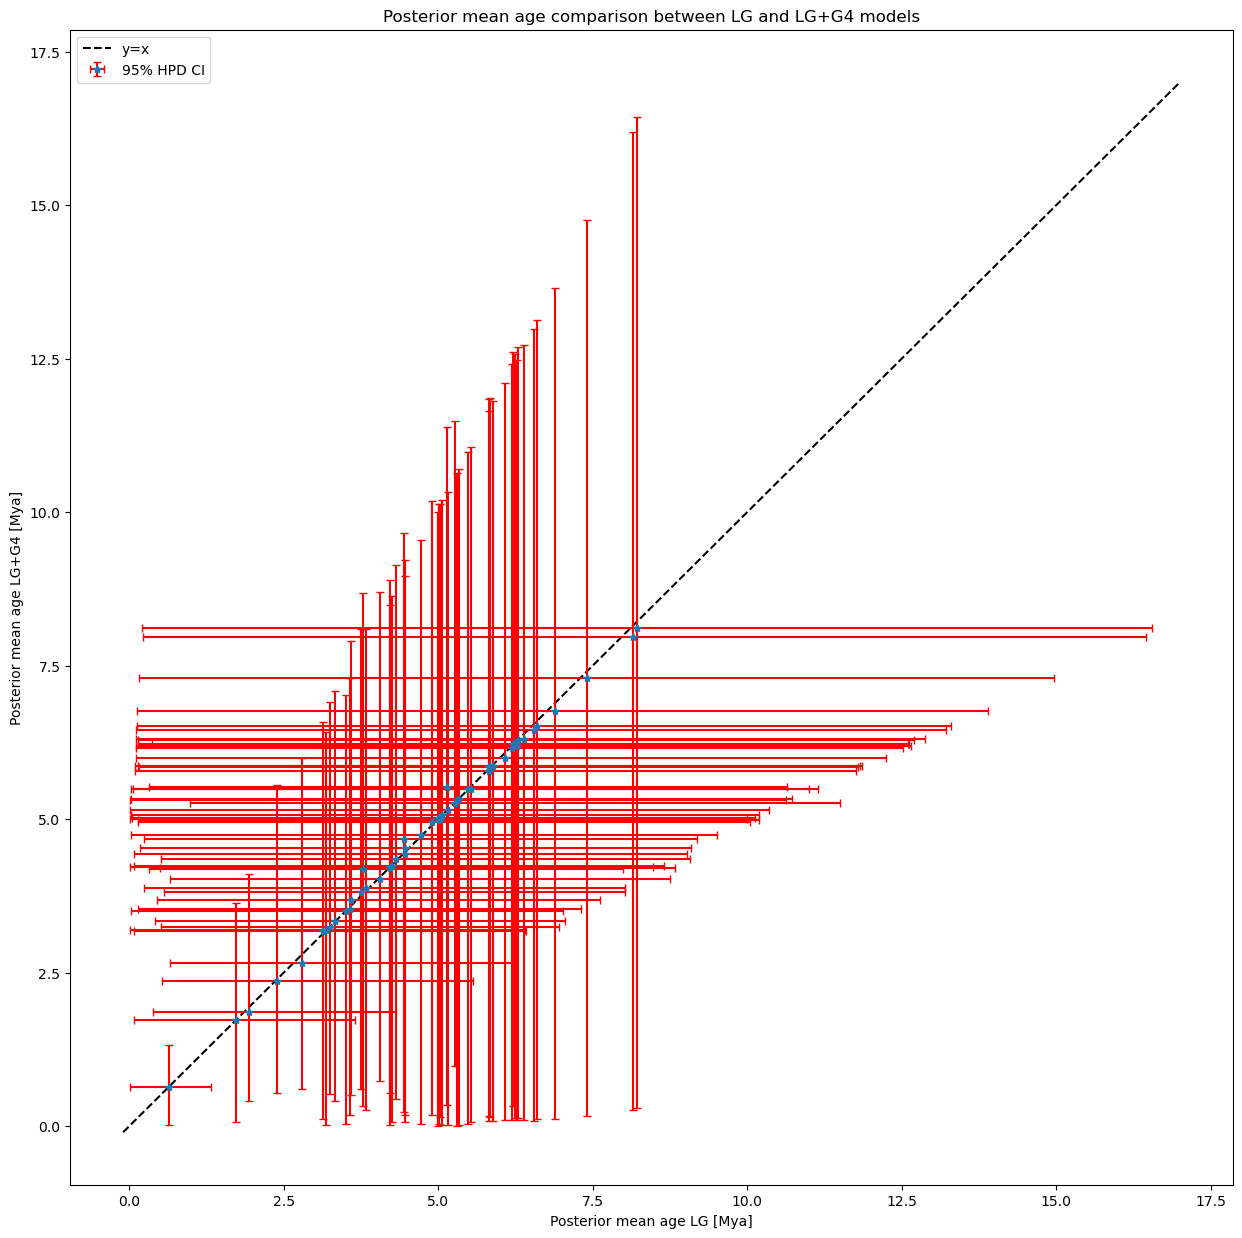

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4.png')

In [24]:
posterior_mean_baseml

[8.2224,
 8.1524,
 7.4044,
 6.8937,
 6.5909,
 6.2488,
 5.8214,
 3.2549,
 5.0197,
 4.4689,
 4.221,
 3.5,
 3.1903,
 1.727,
 0.6345,
 3.8303,
 6.2925,
 5.1454,
 5.8402,
 4.2228,
 3.594,
 5.0662,
 6.5557,
 6.2734,
 6.0718,
 5.8268,
 5.5345,
 5.3361,
 5.158,
 4.994,
 4.4682,
 3.572,
 3.1273,
 5.019,
 4.2434,
 6.3827,
 1.9353,
 6.2001,
 5.8811,
 5.4869,
 5.3069,
 3.7469,
 4.7264,
 4.9017,
 4.4422,
 3.7769,
 3.3239,
 4.313,
 6.206,
 4.0587,
 2.3943,
 2.7985,
 5.273]

In [25]:
posterior_mean_iqtree

[8.1121,
 7.9661,
 7.2912,
 6.7675,
 6.5127,
 6.2274,
 5.8436,
 3.2399,
 4.9834,
 4.4389,
 4.2214,
 3.4983,
 3.1917,
 1.7204,
 0.6344,
 3.8693,
 6.2948,
 5.529,
 5.8607,
 4.2079,
 3.6753,
 5.0669,
 6.4427,
 6.1844,
 6.001,
 5.7763,
 5.4928,
 5.3285,
 5.1533,
 4.9947,
 4.5335,
 3.5406,
 3.1751,
 5.0179,
 4.2359,
 6.3068,
 1.851,
 6.16,
 5.8599,
 5.4834,
 5.3086,
 3.816,
 4.7325,
 4.9545,
 4.6746,
 4.1882,
 3.3406,
 4.3514,
 6.2188,
 4.0251,
 2.3649,
 2.6638,
 5.2654]

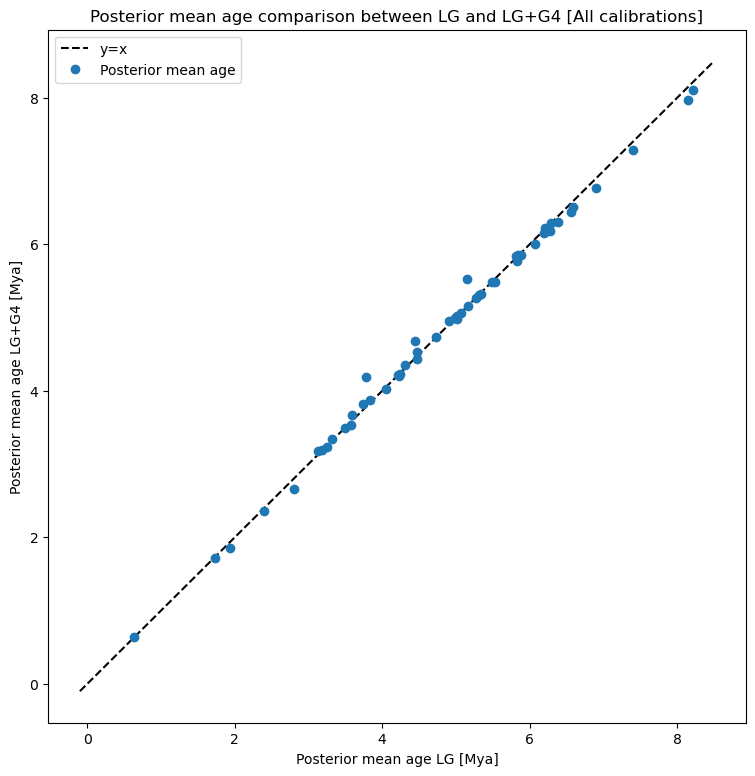

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,8.5], 
        [-0.1, 8.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_scatter.png')